<a href="https://colab.research.google.com/github/huang12332/PyML/blob/main/myAI-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1.1

! git clone https://github.com/sorki/python-mnist
! ./python-mnist/bin/mnist_get_data.sh
! ls -l ./python-mnist/bin
! pip3 install emnist

from emnist import extract_training_samples

# from urilib

Cloning into 'python-mnist'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 246 (delta 1), reused 2 (delta 0), pack-reused 240
Receiving objects: 100% (246/246), 47.14 KiB | 1.43 MiB/s, done.
Resolving deltas: 100% (119/119), done.
--2024-03-10 14:13:49--  http://yann.lecun.com/exdb/mnist/
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/index.html.tmp’

index.html.tmp          [ <=>                ]  28.49K  --.-KB/s    in 0s      

2024-03-10 14:13:49 (272 MB/s) - ‘data/index.html.tmp’ saved [29170]

Loading robots.txt; please ignore errors.
--2024-03-10 14:13:49--  http://yann.lecun.com/robots.txt
Reusing existing connection to yann.lecun.com:80.
HTTP request 

In [ ]:
# STEP 1.2

# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.0

# Use the first 6e4 instances as training and next 1e4 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print("Extracted our samples and divided our training and teting data sets")



Extracted our samples and divided our training and teting data sets


Image Label: y


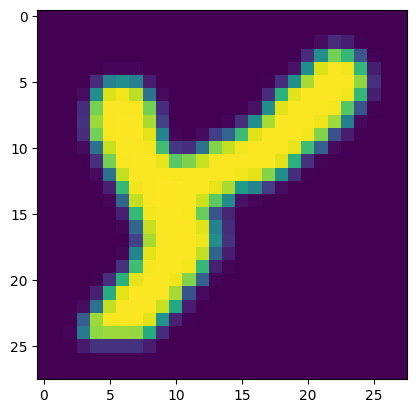

In [ ]:
# STEP 1.3

import matplotlib.pyplot as plt
import numpy as np

img_index = 8888  # <<<< You can update this value to look at other image
img = X_train[img_index]
# y_train = y_train.astype(np.int64)
# print(y_train.dtype)
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [ ]:
# STEP 2.1

# These two lines import the ML lib we needd
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This create first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20,
                    alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)
print("Created our first MLP network")


Created our first MLP network


In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20,
                    alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [ ]:
# STEP 3.3
# You can change this to any letters that you think the nerual network may have confused...
predicted_letter = 'u'
actual_letter='v'

# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if y_test[i] == ord(actual_letter) - 96 and y_pred[i] == ord(predicted_letter) - 96:
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made , we can change this to see an image of a particular one
mistake_to_show = 4

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if len(mistake_list) > mistake_to_show:
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28, 28)))
else:
  print("The number mistake you asked for cannot be shown.")
  print("Couldn't show mistake number " + str(mistke_to_show + 1) + "because there were only " + str(len(mistake_list)) + "mistakes to show")

NameError: name 'y_pred' is not defined

In [ ]:
# STEP 3.4

# Change some of the values in the below statement and re-run to see how they
# affect performance !

mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50,
                    alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

mlp2.fit(X_train, y_train)
print("Training set scrore: %f % mlp2.score(X_train, y_train)")
print("Test set score: %f" % mlp2.score(X_test,y_test))


Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25723763
Iteration 13, loss = 0.24065077
Iteration 14, loss = 0.23433676
Iteration 15, loss = 0.23485496
Iteration 16, loss = 0.23001491
Iteration 17, loss = 0.22096406
Iteration 18, loss = 0.21950345
Iteration 19, loss = 0.20777329
Iteration 20, loss = 0.20980027
Iteration 21, loss = 0.21037847
Iteration 22, loss = 0.20318075
Iteration 23, loss = 0.20824472
Iteration 24, loss = 0.19769558
Iteration 25, loss = 0.19448822
Iteration 26, loss = 0.19312831
Iteration 27, loss = 0.19070016
Iteration 28, loss = 0.19506724
Iteration 29, loss = 0.18994664
Iteration 30, loss = 0.18468292
Iteration 31, loss = 0.19614047
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!python -V

In [ ]:
# STEP 4.1

# Pulls the scanned data set from GitHub
!git clone https://github.com/crash-course-ai/lab1-neural-networks.git
!git pull
!ls lab1-neural-networks/letters_mod
!cd  /content/lab1-neural-networks/letters-letters_mod
!pwd

import os
path, dirs, files = next(os.walk("/cotent/lab1-neural-networks/letters_mod/"))
files.sort(...)


Cloning into 'lab1-neural-networks'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (152/152), 4.60 MiB | 18.71 MiB/s, done.
Resolving deltas: 100% (59/59), done.
fatal: not a git repository (or any of the parent directories): .git
00.jpg	09.jpg	18.jpg	27.jpg	36.jpg	45.jpg	54.jpg	63.jpg	72.jpg	81.jpg	90.jpg	99.jpg
01.jpg	10.jpg	19.jpg	28.jpg	37.jpg	46.jpg	55.jpg	64.jpg	73.jpg	82.jpg	91.jpg
02.jpg	11.jpg	20.jpg	29.jpg	38.jpg	47.jpg	56.jpg	65.jpg	74.jpg	83.jpg	92.jpg
03.jpg	12.jpg	21.jpg	30.jpg	39.jpg	48.jpg	57.jpg	66.jpg	75.jpg	84.jpg	93.jpg
04.jpg	13.jpg	22.jpg	31.jpg	40.jpg	49.jpg	58.jpg	67.jpg	76.jpg	85.jpg	94.jpg
05.jpg	14.jpg	23.jpg	32.jpg	41.jpg	50.jpg	59.jpg	68.jpg	77.jpg	86.jpg	95.jpg
06.jpg	15.jpg	24.jpg	33.jpg	42.jpg	51.jpg	60.jpg	69.jpg	78.jpg	87.jpg	96.jpg
07.jpg	16.jpg	25.jpg	34.jpg	43.jpg	52.jpg	61.jpg	70.jpg	79.jpg	88.jpg	97.jpg
08.jpg	17.jpg	26.jpg	35.jpg	44.jpg	53.jpg	62.jpg	71.jpg	80.jp

StopIteration: 

In [ ]:
# STEP 4.2

# These libaraies let us import the letters , resize them, and print them out
import cv2
import matplotlib,pyplot as plt

#This code processs all the scanned images and adds them to the handwrtten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("/content/lab1-nerual-networks/letters_mod" + files[i], cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[4])  #<----- Change this index to see diff letters

ModuleNotFoundError: No module named 'pyplot'